In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv


In [3]:
## Get the annotations and put the indices into arrays
uc_list = []
dec_list = []
acc_list = []
tachy_list = []
brady_list = []

with open('../data/annotations/csv/annotation_1001.csv', newline='') as csvfile:
    annreader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(annreader):
        joined_row = ''.join(row)
        if 'UC' in joined_row:
            uc_list.append(i)
        if 'DEC' in joined_row:
            dec_list.append(i)
        if 'ACC' in joined_row:
            acc_list.append(i)
        if 'TC' in joined_row:
            tachy_list.append(i)
        if 'BC' in joined_row:
            brady_list.append(i)
            
uc_arr = np.array(uc_list) 
dc_arr = np.array(dec_list)
ac_arr= np.array(acc_list)
tc_arr = np.array(tachy_list)
bc_arr = np.array(brady_list)

In [4]:
df1001 = pd.read_csv('../data/database/signals/1001.csv')
df1001.head(15)

,seconds,FHR,UC
0,0,150.50,7.0
1,1,150.50,8.5
2,2,151.00,8.5
3,3,151.25,7.5
4,4,151.25,9.5
5,5,150.25,8.5
6,6,150.25,10.5
7,7,150.25,12.0
8,8,148.75,11.0
9,9,148.75,11.5


In [5]:
df1001.shape

(19200, 3)

In [9]:
dt = 1
n = df1001.shape[0]
f = df1001['FHR'].to_numpy()
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)

L = np.arange(1, np.floor(n/2), dtype='int')



/Users/landonblakey/.pyenv/versions/3.9.2/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


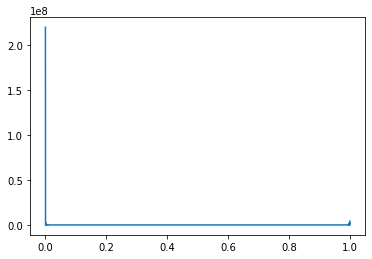

In [16]:
plt.plot(freq, PSD)

In [23]:
import scipy



In [24]:
pchip = scipy.interpolate.PchipInterpolator(df1001['seconds'], df1001['FHR'])

In [25]:
df1001['FHR_spline'] = pchip.__call__(df1001['seconds'])

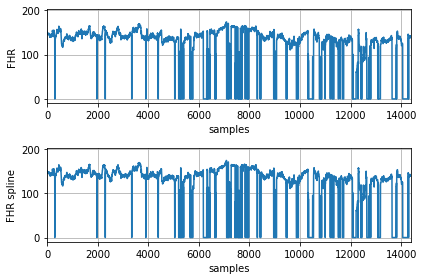

In [26]:
fig, axs = plt.subplots(2, 1)
axs[0].plot(df1001['seconds'], df1001['FHR'])
axs[0].set_xlim(0, 14400)
axs[0].set_xlabel('samples')
axs[0].set_ylabel('FHR')
axs[0].grid(True)

axs[1].plot(df1001['seconds'], df1001['FHR_spline'])
axs[1].set_xlim(0, 14400)
axs[1].set_xlabel('samples')
axs[1].set_ylabel('FHR spline')
axs[1].grid(True)

fig.tight_layout()
plt.show()